# Health Insurance: EDA - Statistical Analysis - Hypothesis Testing

https://www.kaggle.com/code/vinayakshanawad/hypothesis-testing-for-beginners/notebook

## 1. Overview

**Data Description:**

The data at hand contains medical costs of people characterized by certain attributes.

**Domain:**

Healthcare

**Context:**

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

**Attribute Information:**

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance.

**Objective:**

We want to see if we can dive deep into this data to find some valuable insights.

## 2. Import the necessary libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(4, 3)}) #width=4, #height=3

import copy
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

## 3. Data Collection 

In [ ]:
# Reading Insurance data
df = pd.read_csv("Health_insurance.csv")

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 4. EDA (Data analysis and preparation)

In [ ]:
# Shape of the data
df.shape

(1338, 7)

In [ ]:
# Data type of each attribute
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# Checking the presence of missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# 5 point summary of numerical attributes
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe().T #.T: transpose index and columns

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* **Looking at the age column, data is uniformly distributed**

* **Very few people have more than 2 children. 75% of the people have 2 or less children**

* **Charges are skewed to higer values**

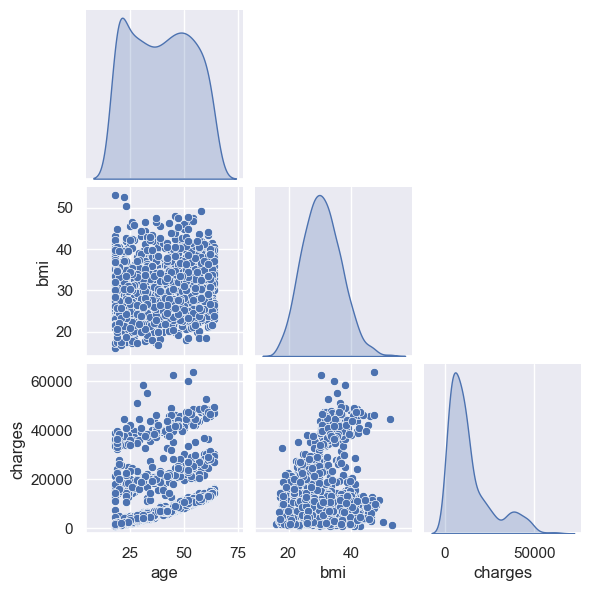

In [ ]:
# Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
df_attr = df.iloc[:, [0,2,6]] #select ‘age’, ‘bmi’ and ‘charges’ columns

sns.pairplot(df_attr, diag_kind='kde', corner=True, height=2)
#KDE: kernel density estimate
plt.show()

* **Age column seems to be uniformly distributed**
* **BMI column seems to be normally distributed**
* **Charges colum -- Right Skewed Distribution --- charges are skewed to higer values**

In [ ]:
# Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
df_attr.skew(axis = 0, skipna = True)

# A skewness value of 0 in the output denotes a symmetrical distribution of values in row 1

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

* **Age column seems to be uniformly distributed as seen in previous step and there is hardly any skewness**
* **BMI column seems to be normally distributed as seen in previous step and there is very little skewness**
* **Charges column -- Right Skewed Distribution --- charges are skewed to higer values**

### 4.1 Univariate analysis 

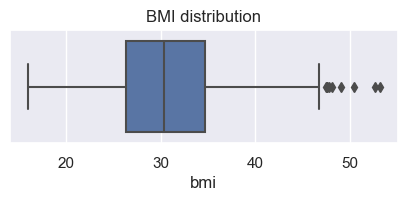

In [ ]:
plt.figure(figsize= (5,5))
plt.subplot(3,1,1) #nrows, ncol, index
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

* **Above plot shows, there are few points between 47 to 55, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.**

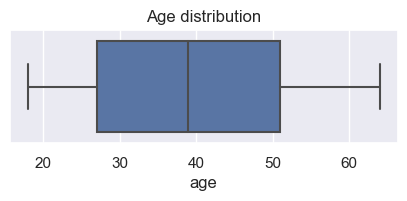

In [ ]:
plt.figure(figsize= (5,5))
plt.subplot(3,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

* **Above plot shows, there are no outliers in 'age' column**

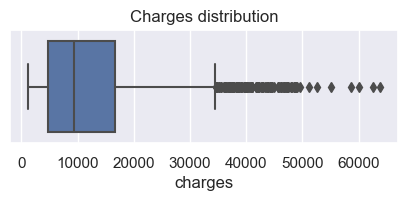

In [ ]:
plt.figure(figsize= (5,5))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

* **Above plot shows, more points between 35000 to 55000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.**

In [ ]:
# Distribution of categorical columns (include children)

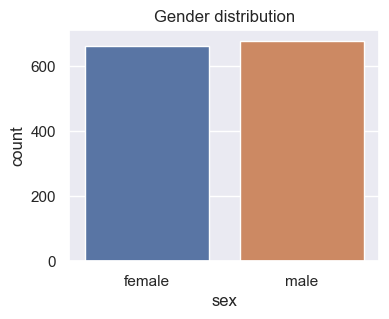

In [ ]:
sns.countplot(x=df['sex']);
plt.title("Gender distribution");
plt.show();

* **Above plot shows, Gender distribution is eqal**

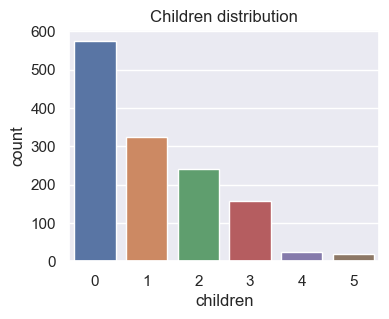

In [ ]:
sns.countplot(x=df['children']);
plt.title("Children distribution");
plt.show();

* **Above plot shows, there are very few customers who have 4 o 5 children and there are most customers who don't have children**

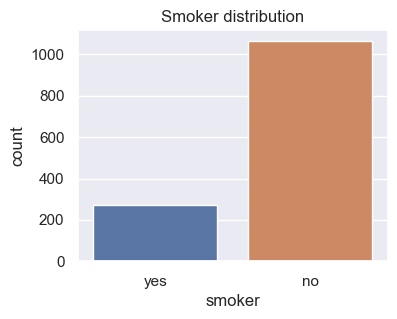

In [ ]:
sns.countplot(x=df['smoker']);
plt.title("Smoker distribution");
plt.show();

* **Above plot shows, there are more non-smokers than smokers in Insurance data frame**

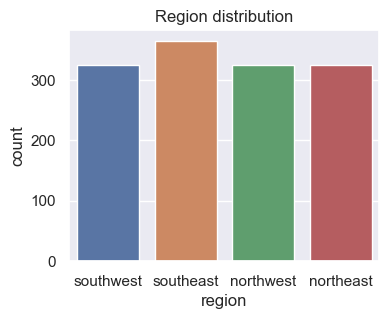

In [ ]:
sns.countplot(x=df['region'])
plt.title("Region distribution");
plt.show();

* **Above plot shows, Region distribution is almost equal**

A shallow copy constructs a new compound object and then (to the extent possible) inserts references into it to the objects found in the original.

A deep copy constructs a new compound object and then, recursively, inserts copies into it of the objects found in the original.

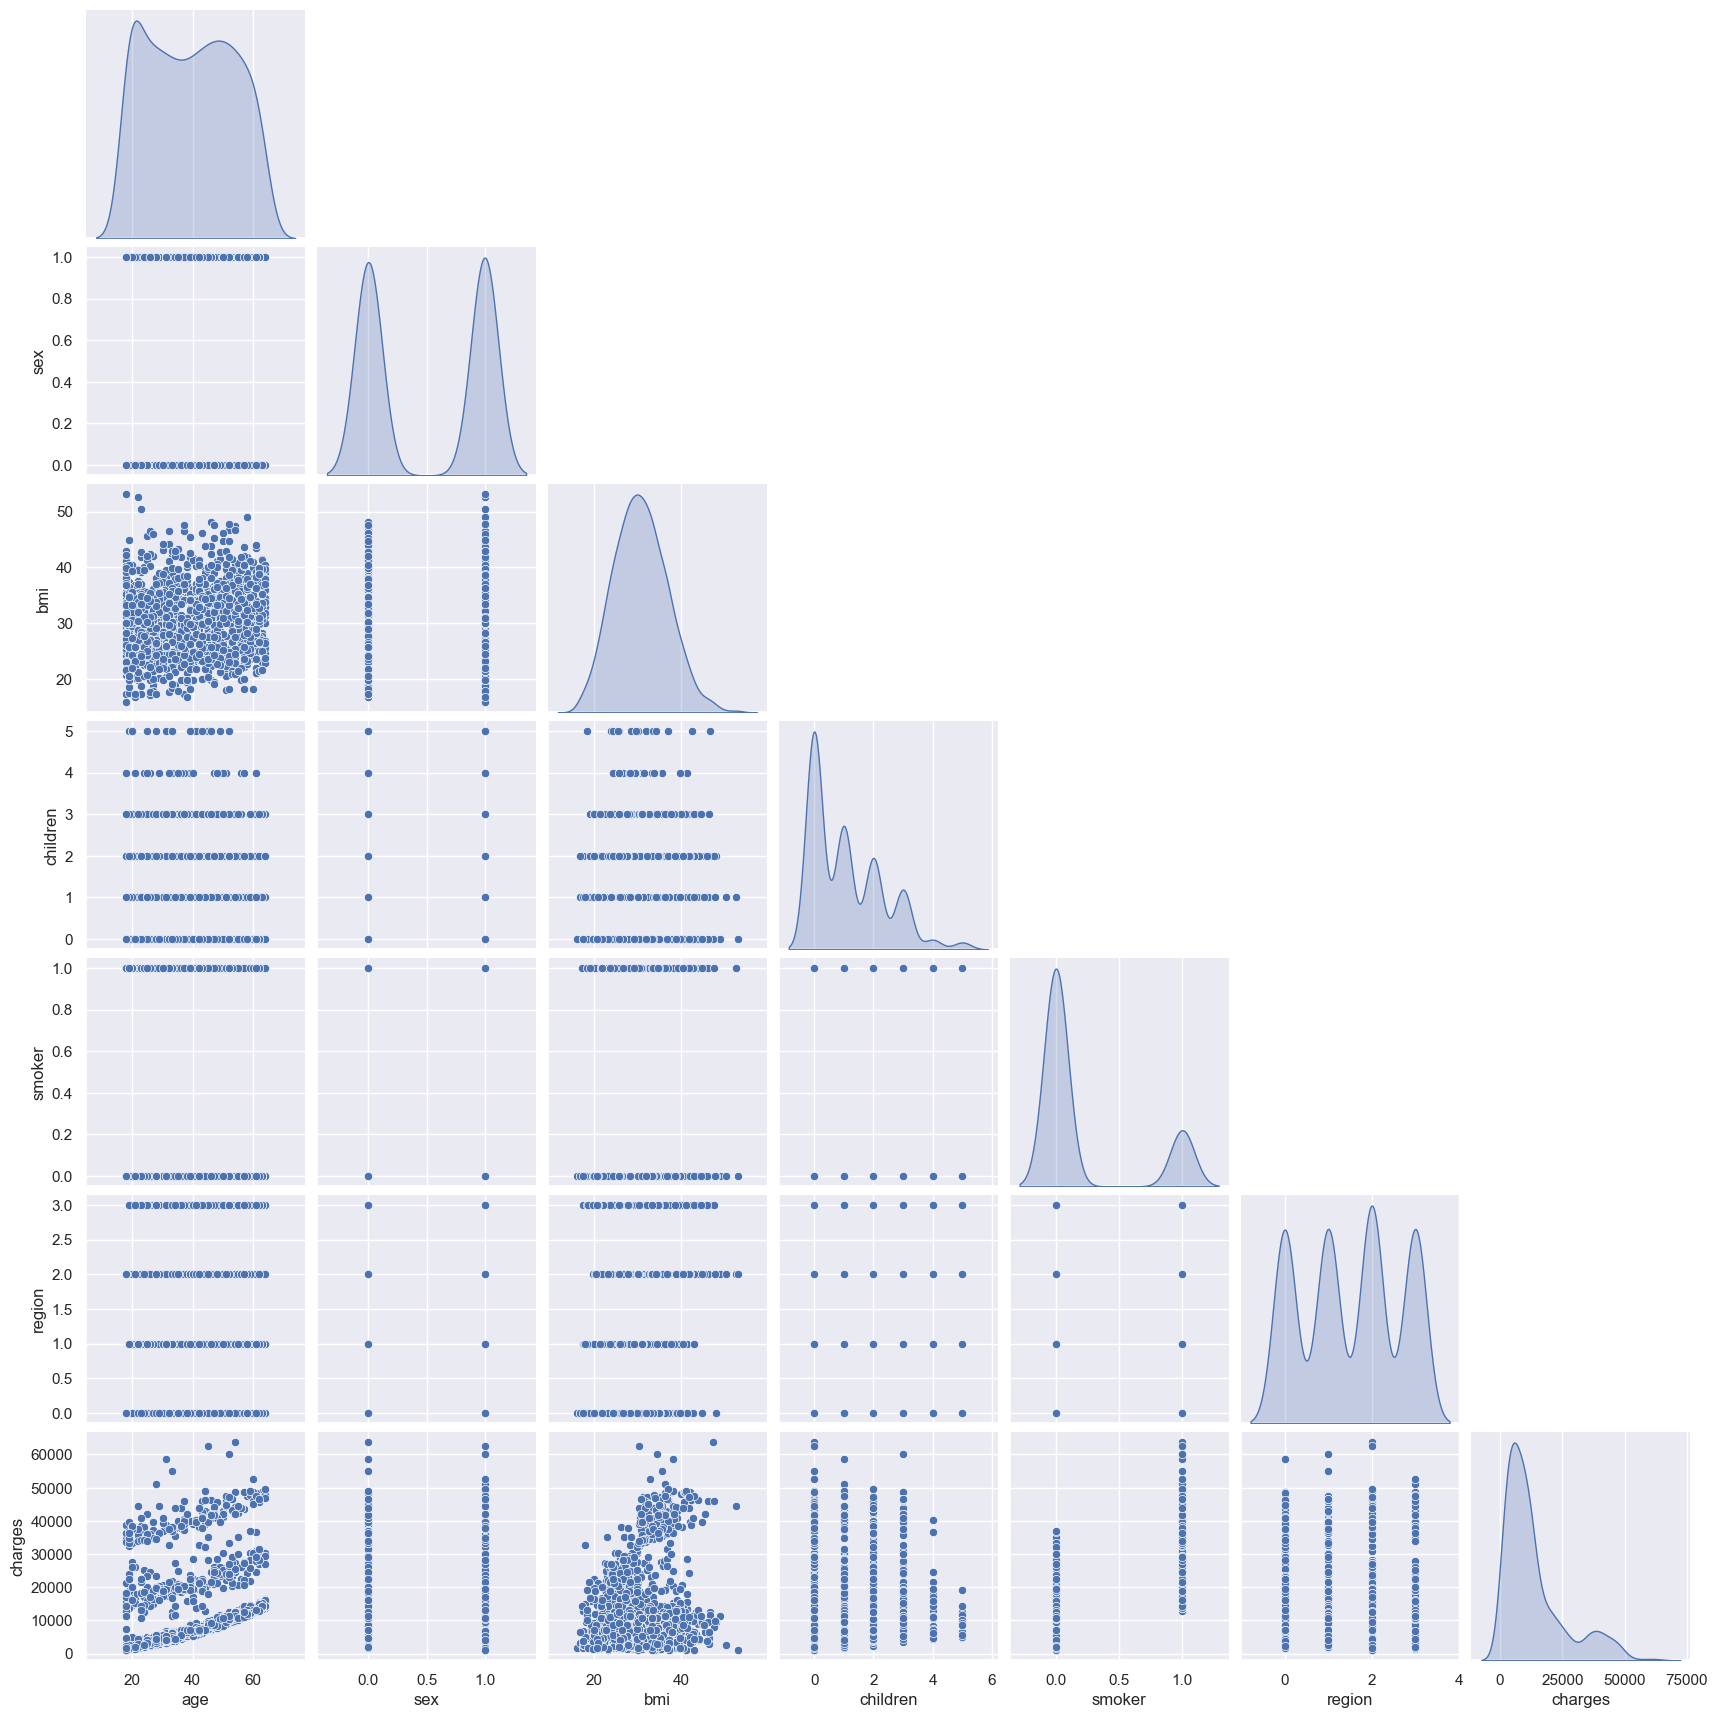

In [ ]:
# Pair plot that includes all the columns of the data frame

df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

#LabelEncoder(): Encode target labels with value between 0 and n_classes-1
#fit_transform: Fit label encoder and return encoded labels.

sns.pairplot(df_encoded, diag_kind ="kde", corner = True)
plt.show()

**By looking into above graph, we can infer below points**

* **Smokers claimed more money than non-smokers**
* **BMI of male and female customers is almost same**

**But statistically we prove it using Hypothesis testing**

### 4.2 Bivariate analysis and Hypothesis testing

#### a. Do charges of people who smoke differ significantly from the people who don't?

In [ ]:
# Checking how many smokers and non-smokers in Insurance Data frame
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

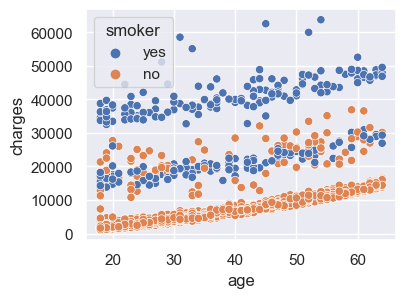

In [ ]:
# Check the charges of smokers and non-smokers across different ages
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

**By looking into above graph, we can say "charges of smokers and non-smokers are different". But is the difference statistically significant?**

**1. State the H0 and Ha**

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, **there is no difference in charges of smokers and non-smokers**

* H<sub>A</sub>: x&#772;<sub>2</sub> &ne; x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> &ne; 0, **there is a difference in charges of smokers and non-smokers**

**2. Decide the significance level: alpha = 0.05**

**3. Identify the test-statistic: 2 sample t - test**

**4. Calculate P_value using test-statistic/t-score**

In [ ]:
smoker_charges = df[df['smoker'] == 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 46.66492117272371
p_value = 8.271435842179102e-283


**5. Decide to Reject or Accept Null Hypothesis**

In [ ]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


=> Hence we **reject Null Hypothesis** (we have enough (95% and 99%) evidence to prove that there is a difference in charges of smokers and non-smokers)

#### b. Does bmi of males differ significantly from that of females?

In [ ]:
# Checking howmany male and female customers in Insurance Data frame
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

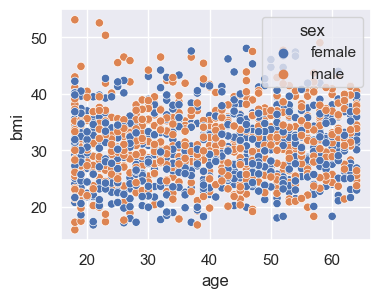

In [ ]:
# Check the bmi of male and female customers across different ages
sns.scatterplot(x = 'age', y = 'bmi', hue = 'sex', data = df);

In [ ]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932


**=> Null hypothesis accepted**

#### c. Is the proportion of smokers significantly different in different genders?

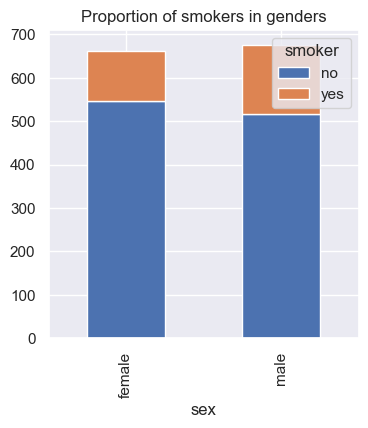

In [ ]:
# Check the bmi of male and female customers across different ages
smoker_gender_table = pd.crosstab(index=df["sex"], columns=df["smoker"]) #pd.crosstab: computes a frequency table of factors

smoker_gender_table.plot(kind="bar", figsize=(4,4), stacked=True);
plt.title('Proportion of smokers in genders')
plt.show()

In [ ]:
smoker_gender_table

smoker,no,yes
sex,,
female,547,115
male,517,159


**Ho = The proportions of smokers in genders are equal**

In [ ]:
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]

n_males = df.sex.value_counts()[0] #subset element 0: male

n_females = df.sex.value_counts()[1] #subset element 1: female

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


In [ ]:
zstat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
#proportions_ztest (statsmodels): Test for proportions based on normal (z) test

print("t_statistic =",zstat)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.005324114164320532


**=> Null hypothesis rejected**

#### d. Is the distribution of bmi across women with no children, one child and two children, the same?

In [ ]:
# Check the bmi of women with no children, one child and two children

zero_child = df[df['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

one_child = df[df['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

two_child = df[df['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

children_bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
df2            = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
df3            = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_df = children_bmi_df.append(df1) 
children_bmi_df = children_bmi_df.append(df2) 
children_bmi_df = children_bmi_df.append(df3)

C:\Users\stoll\AppData\Local\Temp\ipykernel_292\1767950948.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df1)
C:\Users\stoll\AppData\Local\Temp\ipykernel_292\1767950948.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df2)
C:\Users\stoll\AppData\Local\Temp\ipykernel_292\1767950948.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  children_bmi_df = children_bmi_df.append(df3)


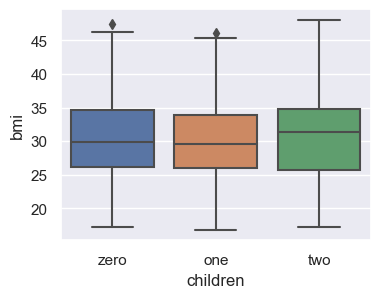

In [ ]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_df);

In [ ]:
# Calculate P_value using ANOVA table
mod = ols('bmi ~ children', data = children_bmi_df).fit() 
#Ordinary Least Squares (OLS), i.e. linear regression 
#'bmi ~ children': dependent variable y ~ (tilde) independent variable x. For more info see 'R-style formulas' below

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


In [ ]:
# ANOVA
from scipy.stats import f_oneway

#f_oneway input: lists
#.tolist(): converts array to list

f_oneway(df1['bmi'], df2['bmi'], df3['bmi'])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

**=> Null hypothesis accepted**

http://faculty.washington.edu/otoomet/machinelearning-py/linear-regression.html#r-style-formulas


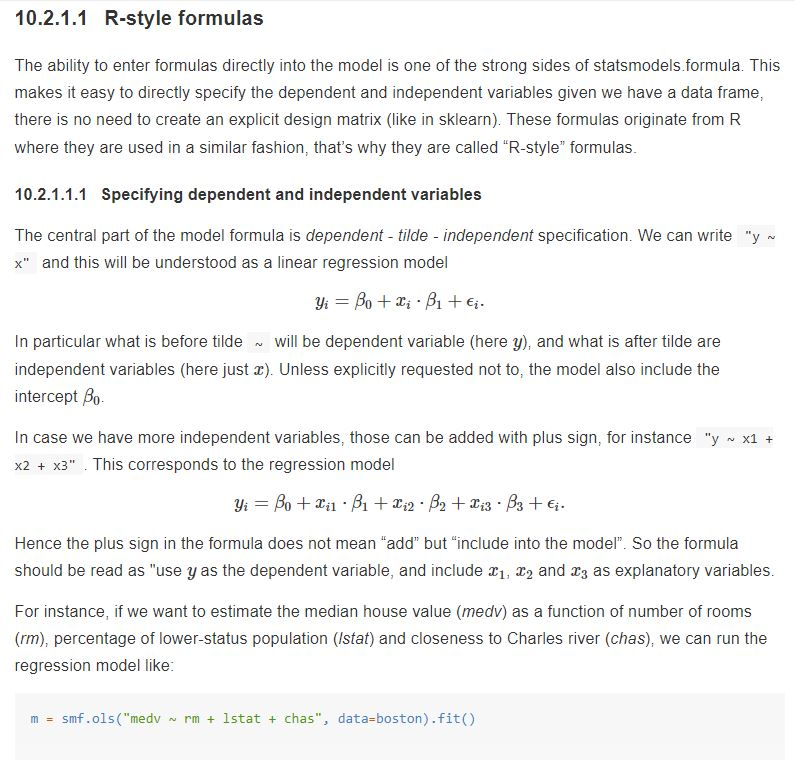